<h1>Task 8: Clustering with K-Means</h1>

<h2>Objective: Perform unsupervised learning with K-Means clustering.<br>
Tools: Tools: Scikit-learn, Pandas, Matplotlib</h2>


<h3>Task to be performed:</h3>
<ol>
<li>Load and visualize dataset (optional PCA for 2D view).
<li>Fit K-Means and assign cluster labels.
<li>Use the Elbow Method to find optimal K.
<li>Visualize clusters with color-coding.
<li>Evaluate clustering using Silhouette Score.
</ol>

<h3>Dataset:- Mall Customer Segmentation Dataset downloaded from Kaggle </h3>

In [1]:
#Import required libabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

<h5>T-1:- Load and visualize dataset (optional PCA for 2D view).</h5>

In [2]:
df = pd.read_csv("Mall_Customers.csv")

print("First few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
# Drop non-numeric/customer identifier columns
df_features = df.select_dtypes(include=[np.number])

In [4]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

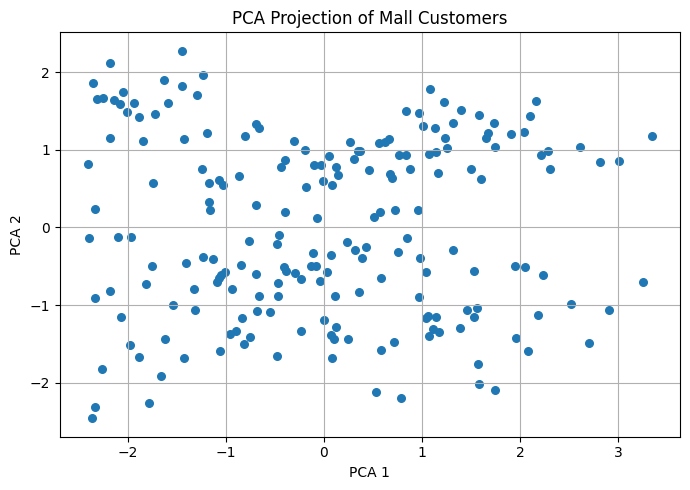

In [5]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30)
plt.title("PCA Projection of Mall Customers")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.tight_layout()
plt.show()

<h5>T-2:- Fit K-Means and assign cluster labels.</h5>

In [6]:
# Fit K-Means and Assign Clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_


In [7]:
# Add cluster info to original data
df['Cluster'] = cluster_labels

<h5>T-3:- Use the Elbow Method to find optimal K.</h5>

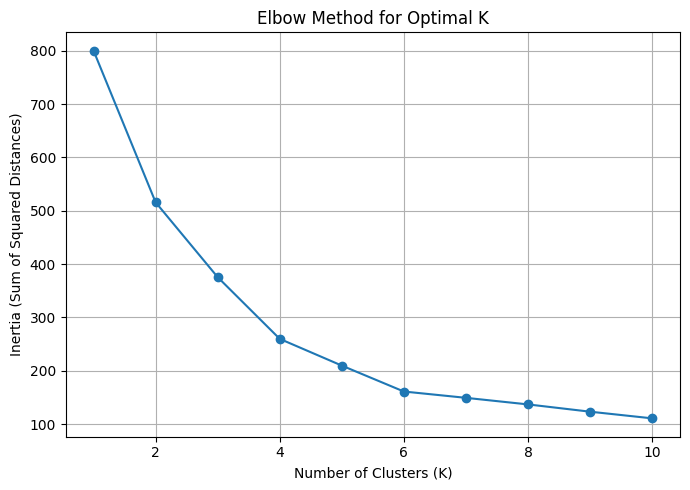

In [8]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid()
plt.tight_layout()
plt.show()

<h5>T-4:- Visualize clusters with color-coding.</h5>

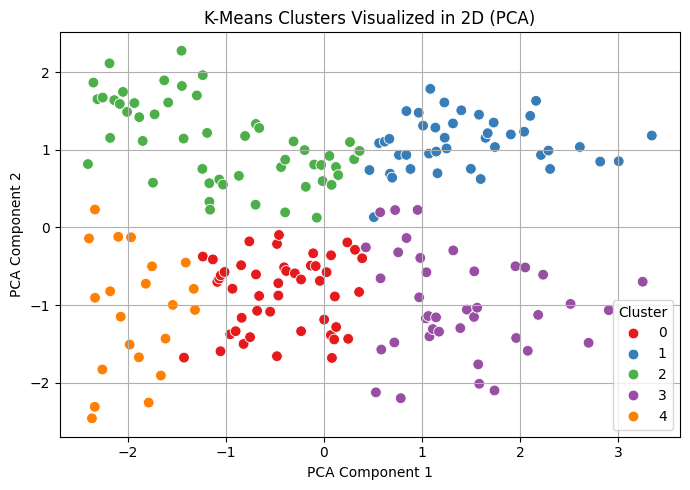

In [9]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set1", s=60)
plt.title("K-Means Clusters Visualized in 2D (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.tight_layout()
plt.show()

<h5>T-5:- Evaluate clustering using Silhouette Score.</h5>

In [10]:
score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for K={kmeans.n_clusters}: {score:.3f}")

Silhouette Score for K=5: 0.427
